# 2.1.1 ベータ分布

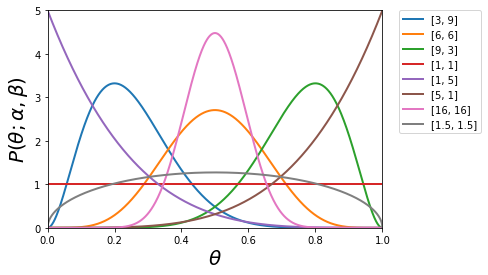

In [89]:
import numpy as np
import math
import scipy.stats
from matplotlib import pyplot as plt


# https://kiito.hatenablog.com/entry/2015/06/07/104420 より
x = np.linspace(0, 1, 1000)
plt.xlim(0, 1)
plt.ylim(0, 5)
plt.xlabel(r"$\theta$",fontsize=20, fontname='serif')
plt.ylabel(r"$P(\theta; \alpha, \beta)$",fontsize=20, fontname='serif')
params = [[3,9],[6,6],[9,3],[1,1],[1,5],[5,1],[16,16],[1.5,1.5]]
for param in params:
    rv = scipy.stats.beta(param[0],param[1])
    y = rv.pdf(x)
    plt.plot(x, y, '-', lw=2, label=param)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0) #凡例を枠外に表示する
plt.show()

# 少し計算してみる

In [143]:
def C(N, m):
    """N回の試行中でm回発生する組み合わせ数"""
    return math.factorial(N) // (math.factorial(N-m)*math.factorial(m))

def P(n, N, theta):
    """確率thetaの二項分布で N回の試行でn回起こ確率"""
    return C(N, n) * (theta**n) * ((1-theta)**(N-n))

def eval_plot(m, l, a, b):
    """ ベータ分布(a, b) 下で 1 が m 回 0 が l 回事象が起こった場合の事後後確率プロット"""
    N = 100
    beta_prior = scipy.stats.beta(a, b)
    beta_post  = scipy.stats.beta(a+m, b+l)
    x = np.linspace(0.01, 0.99, N)
    y0 = beta_prior.pdf(x)
    y1 = beta_post.pdf(x)
    plt.plot(x, y0, label='prior probability')
    plt.plot(x, y1, label='posterior probability')
    
    # simulation
    y2 = []
    for xx in x:
        y2.append(beta_prior.pdf(xx) * P(m, l+m, xx))
    y2 = np.array(y2)
    y2 /= y2.sum()/N
    plt.plot(x, y2, label='posterior probability(sim)')
    plt.legend()

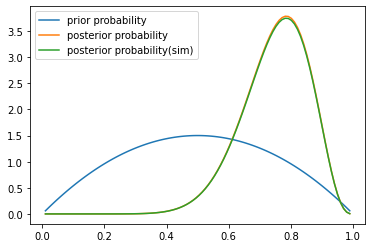

In [136]:
eval_plot(8, 2, 2, 2)

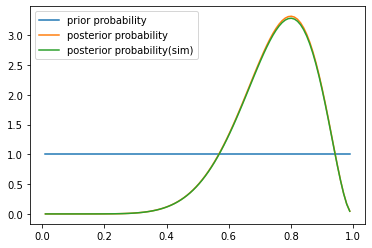

In [137]:
eval_plot(8, 2, 1, 1)

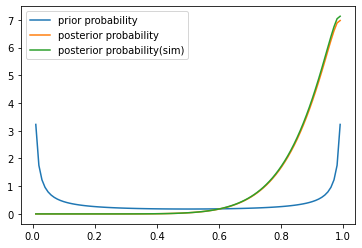

In [138]:
eval_plot(9, 1, 0.1, 0.1)

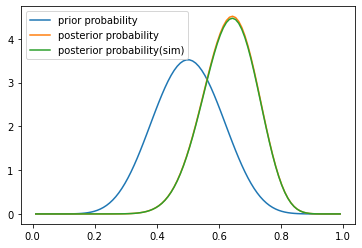

In [142]:
eval_plot(9, 1, 10, 10)